In [ ]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
%cd Mask_RCNN

/content/Mask_RCNN


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
%cd ..

/content


In [ ]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [ ]:
tf.__version__

'1.15.2'

In [ ]:
ROOT_DIR = os.path.abspath("./Mask_RCNN")
ROOT_DIR

'/content/Mask_RCNN'

In [ ]:
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append(ROOT_DIR)
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN']

In [ ]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

Using TensorFlow backend.


In [ ]:
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))
sys.path

['/tensorflow-1.15.2/python3.7',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN',
 '/',
 '/content/Mask_RCNN/samples/coco/']

In [ ]:
import coco

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAG_DIR = os.path.join(ROOT_DIR, 'images')

In [ ]:
MODEL_DIR, IMAG_DIR

('/content/Mask_RCNN/logs', '/content/Mask_RCNN/images')

In [ ]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [ ]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [ ]:
config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
network = modellib.MaskRCNN(mode = "inference", model_dir= MODEL_DIR, config= config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
#run the following command if the load_weights command does not work and then restart runtime:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9MB 27.3MB/s 
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
image = skimage.io.imread("/content/Mask_RCNN/images/2516944023_d00345997d_z.jpg")

skimage.io.imread is better than cv2.imread because it takes images straight in the RGB format whereas cv2.imread reads the images in BGR format

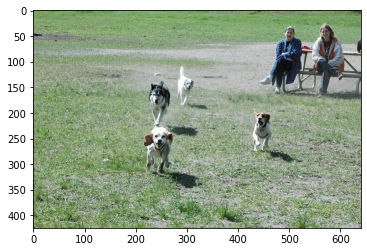

In [ ]:
plt.imshow(image)

In [ ]:
results = network.detect([image], verbose = 1)

Processing 1 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



In [ ]:
results

[{'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
   

In [ ]:
#there are 3 different values for class_ids
#these values correspond to specific detections which are
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

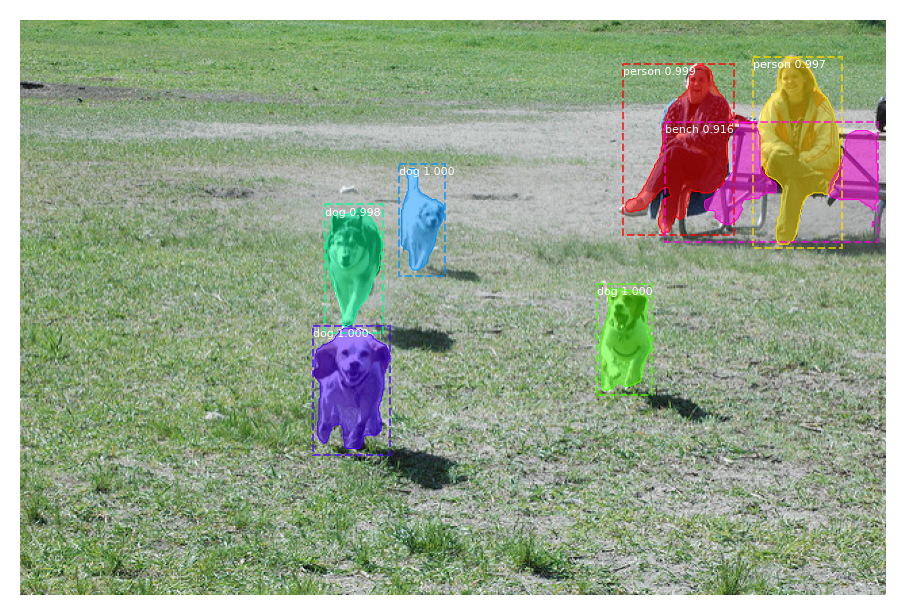

In [ ]:
result = results[0]
visualize.display_instances(image, result['rois'], result['masks'], result['class_ids'], class_names, result['scores'])

In [ ]:
np.unique(result['masks'], return_counts = True)

(array([False,  True]), array([1881596,   22404]))

true values correspond to the detections, whereas the false ones to the background.

In [ ]:
def segment (image, result, index) :
  " to remove the background and get the exact shape of detections "
  mask = result['masks'][:, :, index]

  mask = np.stack((mask,) * 3, axis = -1) #to add new dimension;
  mask = mask.astype('uint8')

  background = 255 - mask * 255   #to make all values eithe 0 or 255

  mask_show = np.invert(background);
  
  mask_img = image * mask;

  result = background + mask_img
  
  return result, mask_show

In [ ]:
segmentation, mask_obj = segment(image, result, 0)

segmentation is for the white background and the mask_obj is for the black background

In [ ]:
def show_segment (image, result, index, show_mask = False) :
  segmentation, mask_obj = segment(image, result, index)

  plt.subplots(1, figsize = (16, 16))
  plt.axis("off")

  if show_mask == True :
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else :
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

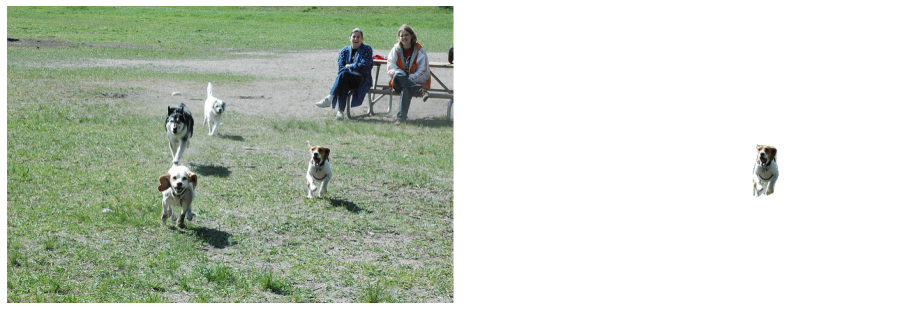

In [ ]:
show_segment(image, result, 0, False)

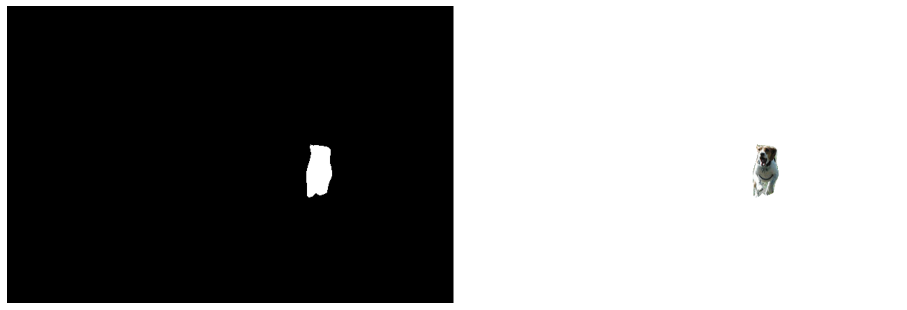

In [ ]:
show_segment(image, result, 0, True)

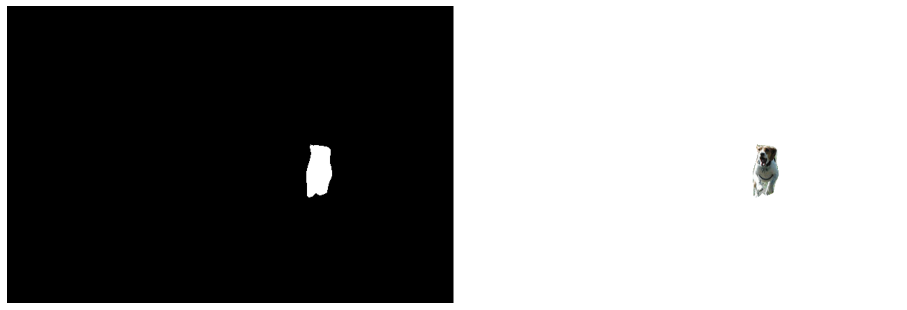

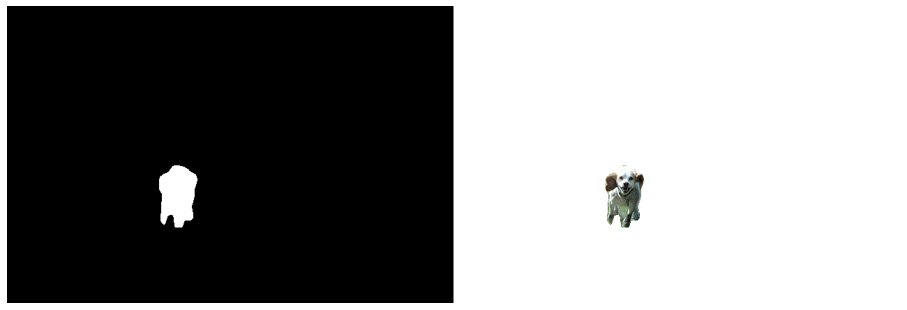

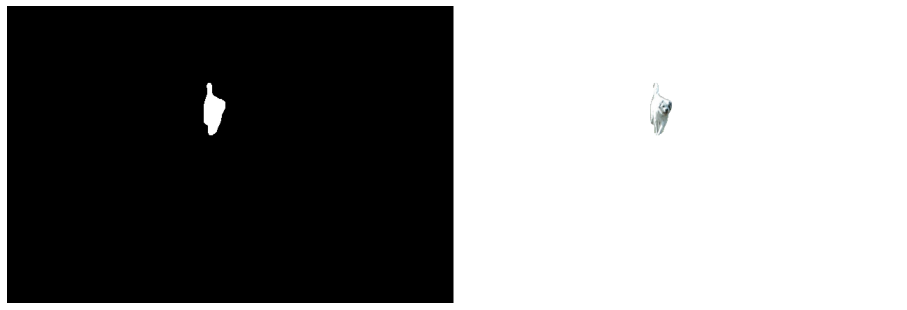

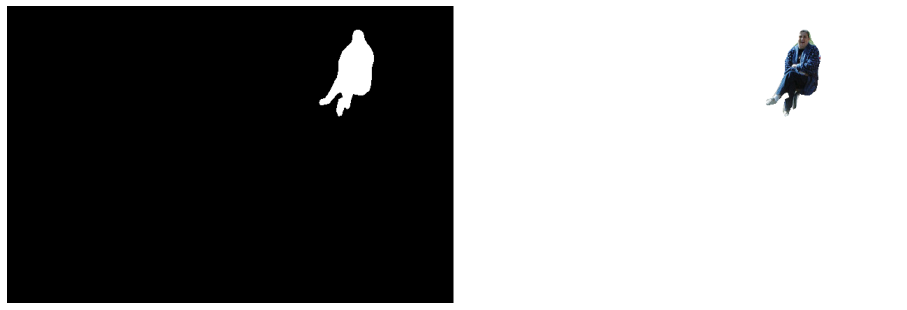

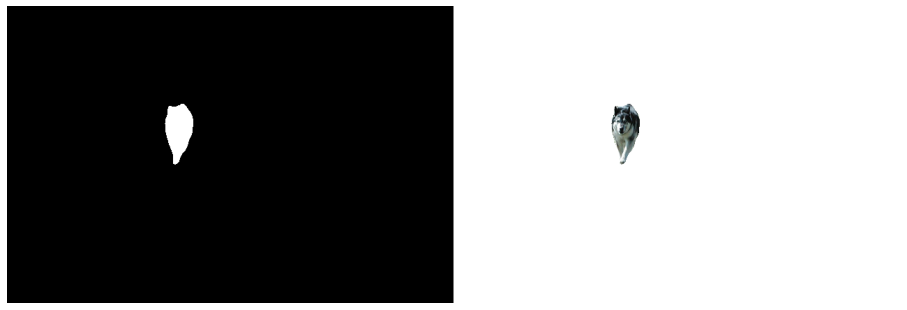

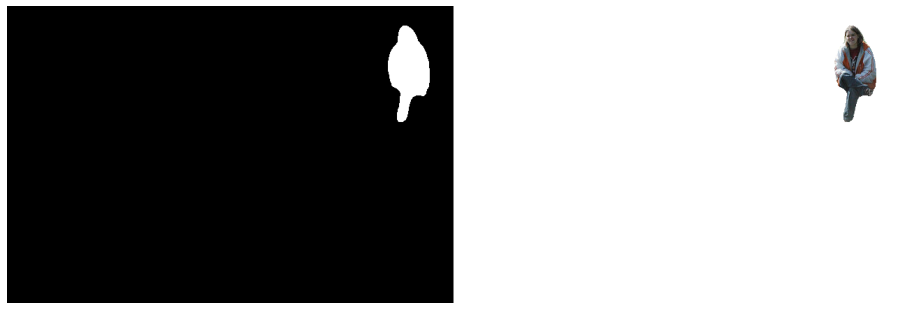

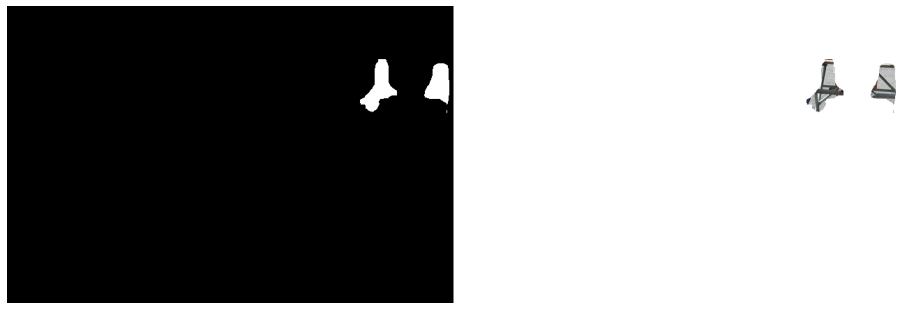

In [ ]:
for i in range(len(result['rois'])): 
  show_segment(image, result, i, True)